# Cost function

In [ ]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def cost_function(y, y_pred):
    m = len(y)
    cost = -(1/m) * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
    return cost

# Example dataset
X = np.array([0.2, 0.4, 0.6])
y = np.array([0, 1, 1])

# Random weights
theta = 0.5
z = X * theta
y_pred = sigmoid(z)

print("Predicted Probabilities:", y_pred)
print("Cost Function Value:", cost_function(y, y_pred))

Predicted Probabilities: [0.52497919 0.549834   0.57444252]
Cost Function Value: 0.6322969246412298


# Gradient_Descent

In [ ]:


import numpy as np
import matplotlib.pyplot as plt


X = np.array([3.4, 5.6, 2.1, 6.7, 1.5, 7.5, 3.3, 5.0, 6.3, 2.8]).reshape(-1, 1)
y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0])


X = (X - np.mean(X)) / np.std(X)


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def compute_cost(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    cost = -np.mean(y * np.log(sigmoid(z) + 1e-8) + (1 - y) * np.log(1 - sigmoid(z) + 1e-8))
    return cost


def gradient_descent(X, y, lr=0.1, epochs=1000):
    m = X.shape[0]
    w = 0.0
    b = 0.0
    costs = []
    w_history, b_history = [], []

    for i in range(epochs):
        z = np.dot(X, w) + b
        A = sigmoid(z)


        dw = np.sum((A - y) * X.reshape(-1)) / m
        db = np.sum(A - y) / m


        w -= lr * dw
        b -= lr * db

        if i % 100 == 0:
            cost = compute_cost(X, y, w, b)
            costs.append(cost)
            w_history.append(w)
            b_history.append(b)
            print(f"Iteration {i}: w = {w:.4f}, b = {b:.4f}, cost = {cost:.4f}")

    return w, b, costs, w_history, b_history

w, b, costs, w_hist, b_hist = gradient_descent(X, y, lr=0.3, epochs=1000)

print("\nFinal Parameters:")
print(f"Weight (w): {w:.4f}")
print(f"Bias (b): {b:.4f}")





Iteration 0: w = 1.3711, b = 0.0000, cost = 0.9040
Iteration 100: w = 138.4853, b = 0.1553, cost = 9.2103
Iteration 200: w = 275.5994, b = 0.1553, cost = 9.2103
Iteration 300: w = 412.7136, b = 0.1553, cost = 9.2103
Iteration 400: w = 549.8277, b = 0.1553, cost = 9.2103
Iteration 500: w = 686.9419, b = 0.1553, cost = 9.2103
Iteration 600: w = 824.0560, b = 0.1553, cost = 9.2103
Iteration 700: w = 961.1702, b = 0.1553, cost = 9.2103
Iteration 800: w = 1098.2843, b = 0.1553, cost = 9.2103
Iteration 900: w = 1235.3984, b = 0.1553, cost = 9.2103

Final Parameters:
Weight (w): 1371.1415
Bias (b): 0.1553


/tmp/ipython-input-3913152663.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


# LR

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report





In [ ]:
X = np.array([3.4, 5.6, 2.1, 6.7, 1.5, 7.5, 3.3, 5.0, 6.3, 2.8]).reshape(-1, 1)
y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0])

X

array([[3.4],
       [5.6],
       [2.1],
       [6.7],
       [1.5],
       [7.5],
       [3.3],
       [5. ],
       [6.3],
       [2.8]])

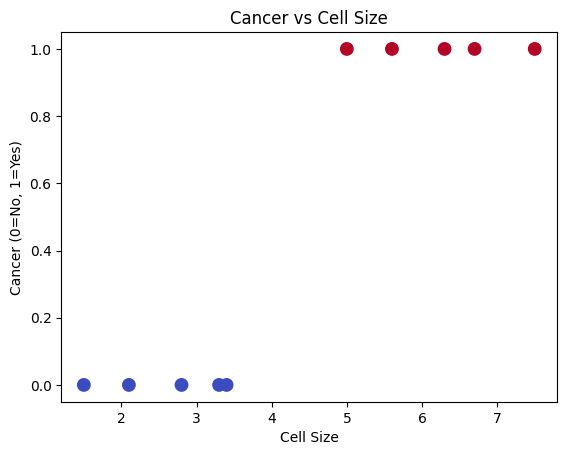

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.scatter(X, y, c=y, cmap='coolwarm', s=80)
plt.xlabel("Cell Size")
plt.ylabel("Cancer (0=No, 1=Yes)")
plt.title("Cancer vs Cell Size")
plt.show()






In [ ]:

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


print(f"Weight (w): {log_reg.coef_[0][0]:.4f}")
print(f"Bias (b): {log_reg.intercept_[0]:.4f}")


Weight (w): 1.1549
Bias (b): -5.4477


In [ ]:

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

print("\nPredicted Classes:", y_pred)
print("Predicted Probabilities:", y_prob)





Predicted Classes: [1 1 1]
Predicted Probabilities: [0.86153621 0.73491202 0.96135661]


In [ ]:

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 1.0
Confusion Matrix:
 [[3]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


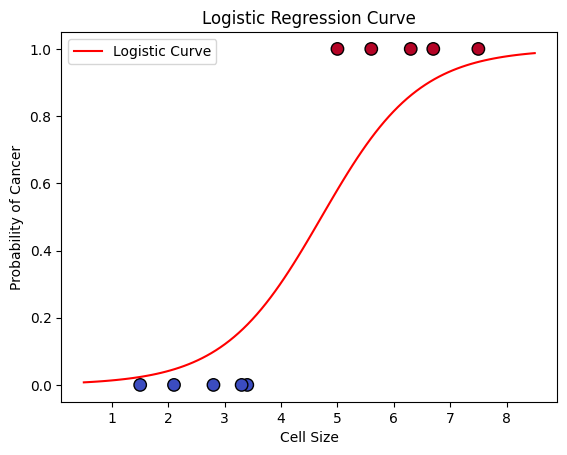

In [ ]:

x_values = np.linspace(min(X)-1, max(X)+1, 100).reshape(-1, 1)
y_values = log_reg.predict_proba(x_values)[:, 1]

plt.plot(x_values, y_values, color='red', label="Logistic Curve")
plt.scatter(X, y, c=y, cmap='coolwarm', s=80, edgecolor='k')
plt.xlabel("Cell Size")
plt.ylabel("Probability of Cancer")
plt.title("Logistic Regression Curve")
plt.legend()
plt.show()